# Assignment 10 Introduction to Machine Learning and Classifiers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### Problem 1

###### Load the breast cancer data into a dataframe. You may name the dataframe whatever you like.

In [2]:
# Data-set info: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None,sep=',') #,usecols=[0,1,2,3,4,5,6,7,8,9,10,11])
df.columns = ['ID NUM', 'diagnosis','radius_mean', 'texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean', 'symmetry_mean','fractal_dimension_mean','radius_SE', 'texture_SE','perimeter_SE','area_SE','smoothness_SE','compactness_SE','concavity_SE','concave_points_SE', 'symmetry_SE','fractal_dimension_SE','radius_worst', 'texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst', 'symmetry_worst','fractal_dimension_worst']
df.to_csv('cancer.csv')
#Oopsies, pulled from the site directly, not the data file on D2L. 
#Looks the same upon inspection.


###### Check the Dataframe's first few rows

In [3]:
df.head()

,ID NUM,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


###### Encode the diagnosis as malignant (M) = 1 and benign (B) = 0 because scikitlearn cannot process categorical data

In [4]:
categories = {'diagnosis':{'M':1,'B':0}}
df.replace(categories,inplace=True)

In [5]:
# If you want to view this column, uncomment the next line and shift-enter this cell (it's a long output)
#df[['diagnosis']]
#Looks right upon inspection

###### Define the feature and target vectors

In [6]:
X = df.loc[:,'radius_mean':'fractal_dimension_worst']
y = df['diagnosis']
#X is the true "data"-not including the id and diagnosis
#Y is the categorized diagnosis 1=malignant, 0=benign

###### Separate the features and targets into a training set (70%) and test set (30%) using a random_state=0.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
#Split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

###### Instantitate the standard scaler and standardize the training and testing feature sets.

In [8]:
from sklearn.preprocessing import StandardScaler

#Scale with standard Scaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Re-combine for plotting the decision regions
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

###### Use KNN to classify whether or not a patient is diagnosed with a malignant or benign tumor
* use p = 2
* use the minkowski metric
* set up a loop to determine the number of neighbors that yields the highest accuracy score using metrics.accuracy_score

0.9649122807017544


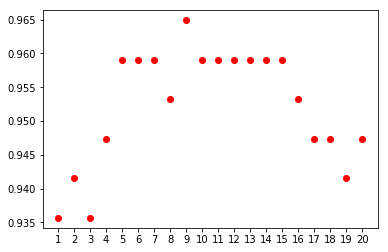

In [9]:
# Import
from sklearn.neighbors import KNeighborsClassifier
p = []
kvec = np.arange(1,21)
for k in kvec:
    # Instantiate
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    # Train
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    p.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(kvec,p,'ro')
plt.xticks(kvec);
print(max(p))
#Note that this peak is at 9-neighbors

###### Instantiate and train KNN with this optimal n_neighbors value and test its accuracy using the metrics.accuracy_score method.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate with 9 neighbors in p2 minkowski
knn = KNeighborsClassifier(n_neighbors=9, p=2, metric='minkowski')
# Train
knn.fit(X_train_std, y_train)
# Predict
#plot_decision_regions(X=X_combined_std, y=y_combined, 
#                      classifier=knn, test_idx=range(105,150))
y_pred = knn.predict(X_test_std)
p = metrics.accuracy_score(y_test,y_pred)# if you call your accuracy score with this variable, it'll print out in the next line
print('KNN is {:3.2f}% accurate.'.format(p*100))

KNN is 96.49% accurate.


#### Given the following data for patients A and B, predict whether or not their tumors are malignant or benign. Remember to standardize XA and XB with sc.transform()

In [11]:
XA = [[1.286e+01, 1.800e+01, 8.319e+01, 5.063e+02, 9.934e-02, 9.546e-02,
        3.889e-02, 2.315e-02, 1.718e-01, 5.997e-02, 2.655e-01, 1.095e+00,
        1.778e+00, 2.035e+01, 5.293e-03, 1.661e-02, 2.071e-02, 8.179e-03,
        1.748e-02, 2.848e-03, 1.424e+01, 2.482e+01, 9.188e+01, 6.221e+02,
        1.289e-01, 2.141e-01, 1.731e-01, 7.926e-02, 2.779e-01, 7.918e-02]]
XB = [[1.877e+01, 2.143e+01, 1.229e+02, 1.092e+03, 9.116e-02, 1.402e-01,
        1.060e-01, 6.090e-02, 1.953e-01, 6.083e-02, 6.422e-01, 1.530e+00,
        4.369e+00, 8.825e+01, 7.548e-03, 3.897e-02, 3.914e-02, 1.816e-02,
        2.168e-02, 4.445e-03, 2.454e+01, 3.437e+01, 1.611e+02, 1.873e+03,
        1.498e-01, 4.827e-01, 4.634e-01, 2.048e-01, 3.679e-01, 9.870e-02]]

In [12]:
# Patient A Diagnosis
A_test_std = sc.transform(XA)
A_pred = knn.predict(A_test_std)
if(A_pred):
    print('The tumor is Malignant')
else:
    print('The tumor is Benign')

The tumor is Benign


In [13]:
# Patient B Diagnosis
B_test_std = sc.transform(XB)
B_pred = knn.predict(B_test_std)
if(B_pred):
    print('The tumor is Malignant')
else:
    print('The tumor is Benign')

The tumor is Malignant


### Problem 2

###### Read in 'fruit_data.csv'.

In [14]:
ff = pd.read_csv('./fruit_data.csv')

###### Check the dataframes first few rows.

In [15]:
ff.head()

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79


###### Define the feature and target vectors

In [16]:
X = ff.loc[:,'mass':'color_score']
y = ff['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

###### Pick a classifier and train it on this data set. You may play with
* KNN
* SVM
* ???

## KNN Classifier

0.9444444444444444


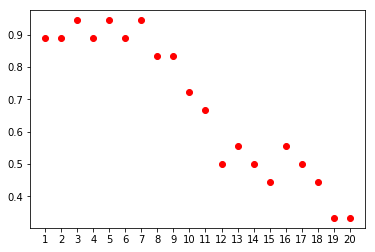

In [17]:
p = []
kvec = np.arange(1,21)
for k in kvec:
    # Instantiate
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    # Train
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    p.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(kvec,p,'ro')
plt.xticks(kvec);
print(max(p))

### Note that the for 3 neighbors we have max accuracy with least "Cost"

In [18]:
# Instantiate
knn = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')
# Train
knn.fit(X_train_std, y_train)
# Predict
y_pred = knn.predict(X_test_std)
p = metrics.accuracy_score(y_test,y_pred)# if you call your accuracy score with this variable, it'll print out in the next line
print('KNN is {:3.2f}% accurate.'.format(p*100))

KNN is 94.44% accurate.


## SVM Classifier

In [19]:
# Instantiate
svmlin = SVC(kernel='linear', C=1.0, random_state=0)
# Train
svmlin.fit(X_train_std, y_train)
y_pred = svmlin.predict(X_test_std)
p = metrics.accuracy_score(y_test,y_pred)
print('Linear SVM is {:3.2f}% accurate.'.format(p*100))

Linear SVM is 72.22% accurate.


In [20]:
# Instantiate
svm = SVC(kernel='rbf', gamma = 0.3, C = 1.0, random_state=0)
# Train
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
p = metrics.accuracy_score(y_test,y_pred)
print('SVM is {:3.2f}% accurate.'.format(p*100))

SVM is 88.89% accurate.


### Use non-linear SVM

###### Here is a dictionary for the categories. Note that this data set already has a column called 'fruit_label' that is encoded with 1, 2, 3, 4 for each fruit type. This dictionary can be used for labeling the output.

In [21]:
categories = {1:'apple',2:'mandarin',3:'orange',4:'lemon'}

###### Test your classifier on [170, 8.0, 8.4, 0.5]

In [22]:
# Replace ??? with your classifier's name
#KNN pred
k=categories[knn.predict([[170,8.0,8.4,0.5]])[0]]
print('KNN predicts '+ k)
#SVM pred
s=categories[svm.predict([[170,8.0,8.4,0.5]])[0]]
print('SVM predicts '+ s)
#Trust KNN over SVM based on accuracy prediction

KNN predicts orange
SVM predicts apple


###### Plot decision regions using only the mass and color_score features

In [23]:
X = ff.loc[:,['mass','color_score']]
y = ff['fruit_label']

In [24]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, test_idx = None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface by classifying with only 2 features
    # Need to repeat for the number of additional features
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    # Plot the regions
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1],c='k',
                   alpha = 1.0, linewidth=2, marker='.',
                   s=55,label='test set')

###### You will need to standardize the feature data first

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Re-combine for plotting the decision regions
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

###### Decision region

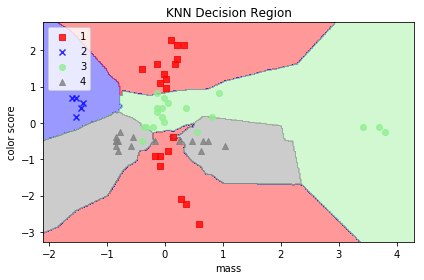

In [26]:
# Instantiate
knn = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')
# Train
knn.fit(X_train_std, y_train)
#predict
y_pred = knn.predict(X_test_std)

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=knn)
plt.xlabel('mass')
plt.ylabel('color score')
plt.legend(loc='upper left')
plt.title('KNN Decision Region')
plt.tight_layout()
plt.savefig('./my_knnfruit_classifier.png', dpi=300)
plt.show()

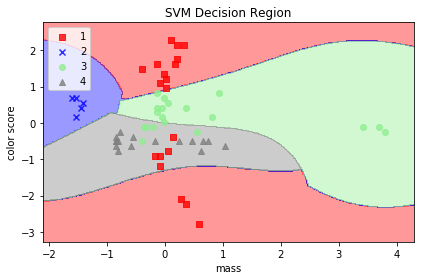

In [27]:
# Instantiate
svm = SVC(kernel='rbf', gamma = 0.3, C = 1.0, random_state=0)
# Train
svm.fit(X_train_std, y_train)
#Predict
y_pred = svm.predict(X_test_std)

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=svm)
plt.xlabel('mass')
plt.ylabel('color score')
plt.legend(loc='upper left')
plt.title('SVM Decision Region')
plt.tight_layout()
plt.savefig('./my_svmfruit_classifier.png', dpi=300)
plt.show()

We see that the SVM region has smoother boundaries, as we would expect, but the "lemon" region covers some of the apple data. This is potentially due to the test/training split randomness, but is still a problem for accuracy nonetheless. The KNN regions are more rough at the edges, but extends the "apple" region to cover some of the data in the "lemon" region of the SVM model. We trust this more. We also get this accuracy with only 3 neighbors, which is a fairly low number.